In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from dataset import Dataset
from utils import Utilities as utils
# for Notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset Creation
Import data into a pandas dataframe using the created class Dataset

In [26]:
ds = Dataset()
files = os.listdir(ds.base_path+"/data/")
ds.createDataset(files)

/home/wiz/Git/LFN-Project/dataset.py:34: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")
/home/wiz/Git/LFN-Project/dataset.py:34: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")
/home/wiz/Git/LFN-Project/dataset.py:34: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")
/home/wiz/Git/LFN-Project/dataset.py:34: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")


Show created dataframe

In [27]:
ds.df.columns

Index(['Project Reference', 'Academic Year', 'Mobility Start Month',
       'Mobility End Month', 'Mobility Duration', 'Activity (mob)',
       'Field of Education', 'Participant Nationality', 'Education Level',
       'Participant Gender', 'Participant Profile', 'Special Needs',
       'Fewer Opportunities', 'GroupLeader', 'Participant Age',
       'Sending Country Code', 'Sending City', 'Sending Organization',
       'Sending Organisation Erasmus Code', 'Receiving Country Code',
       'Receiving City', 'Receiving Organization',
       'Receiving Organisation Erasmus Code', 'Participants'],
      dtype='object')

Now we apply the cleanup pre-processing onto the dataframe, in which we also filter the columns we need

In [30]:
# Select only needed for the analysis 
ds.applyPreprocessing(columns=["Participants","Mobility Duration", "Sending Country Code", "Receiving Country Code",
                               "Special Needs", "Fewer Opportunities", "Participant Profile",
                               "Sending Organization", "Receiving Organization", "Receiving Organisation Erasmus Code",
                               "GroupLeader", "Sending Organisation Erasmus Code", "Education Level"])

# Remove all NaN values
ds.cleanDataframe()

Removed 11 columns
Removed 0 rows


In [31]:
ds.df

,Mobility Duration,Education Level,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Sending Country Code,Sending Organization,Sending Organisation Erasmus Code,Receiving Country Code,Receiving Organization,Receiving Organisation Erasmus Code,Participants
0,1.0,??? - ? Unknown ?,Learner,No,Yes,No,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,2
1,1.0,??? - ? Unknown ?,Learner,No,Yes,No,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,3
2,1.0,??? - ? Unknown ?,Learner,No,Yes,No,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,3
3,1.0,??? - ? Unknown ?,Learner,No,Yes,No,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,4
4,1.0,??? - ? Unknown ?,Learner,No,Yes,No,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
736429,7.0,??? - ? Unknown ?,Staff,No,Yes,Yes,UK,YOUTH INNOVATION LTD,-,UK,YOUTH INNOVATION LTD,-,1
736430,7.0,??? - ? Unknown ?,Staff,No,Yes,Yes,UK,YOUTH INNOVATION LTD,-,UK,YOUTH INNOVATION LTD,-,1
736431,7.0,??? - ? Unknown ?,Staff,No,Yes,No,UK,YOUTH INNOVATION LTD,-,UK,YOUTH INNOVATION LTD,-,1
736432,7.0,??? - ? Unknown ?,Staff,No,No,No,UK,YOUTH INNOVATION LTD,-,UK,YOUTH INNOVATION LTD,-,1


Filter Data

In [32]:
# Select only the eramus students researchers from Italy
ds.applyFilter(column="Sending Country Code", value="IT")
# Select only students currently under bachelor degree
ds.applyFilter(column="Education Level", value="ISCED-7", criterion='contains')

The resulting dataframe becomes 

In [33]:
ds.df

,Mobility Duration,Education Level,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Sending Country Code,Sending Organization,Sending Organisation Erasmus Code,Receiving Country Code,Receiving Organization,Receiving Organisation Erasmus Code,Participants
23723,90.0,ISCED-7 - Second cycle / Master’s or equivalen...,Learner,No,No,No,IT,UNIVERSITA IUAV DI VENEZIA,I VENEZIA02,BE,Architecture Workroom Brussels,-,1
23725,63.0,ISCED-7 - Second cycle / Master’s or equivalen...,Learner,No,No,No,IT,UNIVERSITA DI PISA,I PISA01,PT,Instituto de Tecnologia Quimica e Biologica An...,-,1
23726,79.0,ISCED-7 - Second cycle / Master’s or equivalen...,Learner,No,No,No,IT,UNIVERSITA DI PISA,I PISA01,FR,ECOLE NORMALE SUPERIEURE,F PARIS087,1
23727,61.0,ISCED-7 - Second cycle / Master’s or equivalen...,Learner,No,No,No,IT,UNIVERSITA DI PISA,I PISA01,IE,UNIVERSITY COLLEGE CORK - NATIONAL UNIVERSITY...,IRLCORK01,1
23728,90.0,ISCED-7 - Second cycle / Master’s or equivalen...,Learner,No,No,No,IT,UNIVERSITA DI PISA,I PISA01,SE,LUNDS UNIVERSITET,S LUND01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639955,163.0,ISCED-7 - Second cycle / Master’s or equivalen...,Learner,No,No,No,IT,UNIVERSITA DEGLI STUDI DI PALERMO,I PALERMO01,TN,UNIVERSITE DE TUNIS EL MANAR,-,1
639956,176.0,ISCED-7 - Second cycle / Master’s or equivalen...,Learner,No,No,No,IT,UNIVERSITA DEGLI STUDI DI PALERMO,I PALERMO01,TN,UNIVERSITE DE TUNIS EL MANAR,-,1
639957,176.0,ISCED-7 - Second cycle / Master’s or equivalen...,Learner,No,No,No,IT,UNIVERSITA DEGLI STUDI DI PALERMO,I PALERMO01,TN,UNIVERSITE DE TUNIS EL MANAR,-,1
683475,3.0,ISCED-7 - Second cycle / Master’s or equivalen...,Staff,No,No,No,IT,Blu Comando Stellare,-,RO,UNIVERSITATEA DE ARTA SI DESIGN DIN CLUJ-NAPOCA,RO CLUJNAP06,2


# Graph creation
We can now go ahead and create our graph, again using the Dataset class 

In [34]:
from graph import CustomGraph as Graph


In [48]:
CountryGraph = Graph()
# every node will correspond to a country
CountryGraph.addCountryNodes(ds.getCountryNodes())

UniNodes = Graph()
# every node will correspond to a University
UniNodes.addUniversityNodes(ds.getUniversitiesNodes())



Add node: AT
Add node: SV
Add node: LT
Add node: SI
Add node: UK
Add node: CZ
Add node: IN
Add node: IL
Add node: PL
Add node: MT
Add node: UZ
Add node: HU
Add node: CL
Add node: BA
Add node: XK
Add node: KR
Add node: MG
Add node: BG
Add node: HR
Add node: IS
Add node: MZ
Add node: TN
Add node: EE
Add node: GE
Add node: ES
Add node: PH
Add node: SG
Add node: TW
Add node: BE
Add node: UG
Add node: GT
Add node: SO
Add node: LU
Add node: SN
Add node: AM
Add node: NL
Add node: LB
Add node: ZA
Add node: EL
Add node: JP
Add node: PT
Add node: IE
Add node: DE
Add node: MA
Add node: AZ
Add node: KH
Add node: CU
Add node: PS
Add node: RS
Add node: IR
Add node: MM
Add node: DZ
Add node: BY
Add node: MY
Add node: EG
Add node: MO
Add node: UA
Add node: TR
Add node: CY
Add node: LA
Add node: MD
Add node: CA
Add node: KG
Add node: ET
Add node: BO
Add node: AU
Add node: SE
Add node: CN
Add node: DK
Add node: JO
Add node: TH
Add node: KE
Add node: VN
Add node: NO
Add node: IT
Add node: RO
Add node: AL

[autoreload of graph failed: Traceback (most recent call last):
  File "/home/wiz/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/home/wiz/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/wiz/Git/LFN-Project/graph.py", line 61
    def computeBestPageRank(self)
                                 ^
SyntaxError: expected ':'
]


KeyboardInterrupt: 

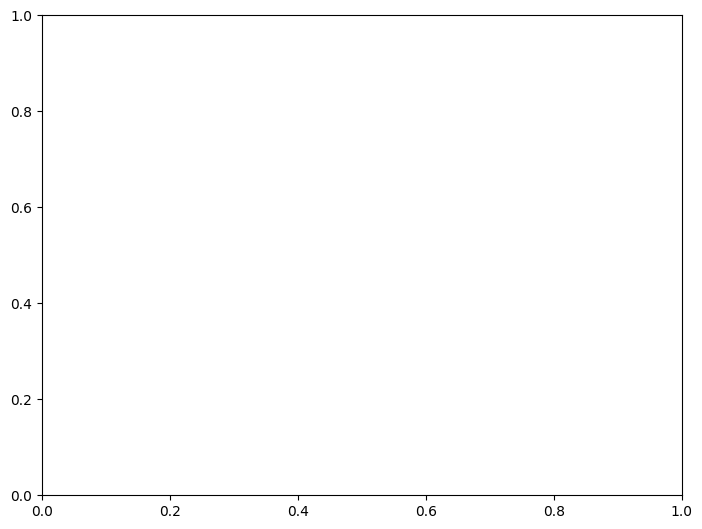

In [49]:
nx.draw(UniNodes, with_labels=True, font_weight='bold')
plt.show()

Add the weighted edges

In [37]:
import networkx as nx
import pandas as pd
edges = pd.DataFrame({"source" : ds.df["Sending Country Code"],
                      "target" : ds.df["Receiving Country Code"],
                      "weight" : ds.df["Participants"]
                         })
CountryGraph = nx.from_pandas_edgelist(edges, "source", "target", "weight", nx.DiGraph())

{('IT',
  'BE'): Text(-0.30717042634153185, 0.39829722902752723, "{'weight': 1}"),
 ('IT',
  'PT'): Text(-0.30338387470847816, -0.4330599265234163, "{'weight': 1}"),
 ('IT',
  'FR'): Text(0.014915597053802604, -0.4218610662878494, "{'weight': 1}"),
 ('IT', 'IE'): Text(-0.4354853286364778, 0.09808984680897095, "{'weight': 1}"),
 ('IT', 'SE'): Text(-0.3673420238306789, 0.339961498100465, "{'weight': 1}"),
 ('IT', 'UK'): Text(0.05754113235427863, 0.46566934893372286, "{'weight': 1}"),
 ('IT', 'AT'): Text(-0.2808335671780612, 0.34227432650911166, "{'weight': 1}"),
 ('IT', 'DE'): Text(0.10241467815750886, 0.483172051680687, "{'weight': 1}"),
 ('IT', 'ES'): Text(0.14772419791435884, 0.4593132903109017, "{'weight': 1}")}

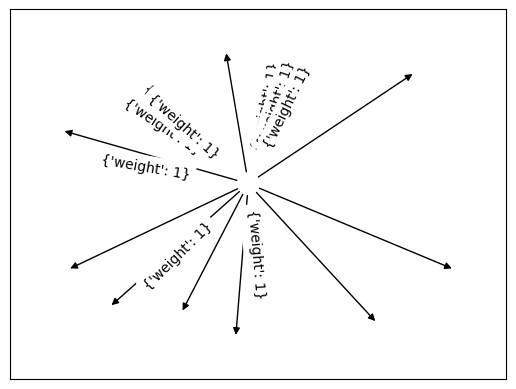

In [38]:
# Code to visualize ten nodes of the graph with their edges
nodes = list(CountryGraph.nodes())
first_10_nodes = nodes[:10]
G = nx.subgraph(CountryGraph, first_10_nodes)
nx.draw_networkx_edges(G,pos=nx.spring_layout(CountryGraph))
nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(CountryGraph))

In [40]:
# Code to visualize the graph with PYVIS tool
from pyvis.network import Network
net = Network(directed=True)
net.from_nx(CountryGraph)
net.show("example.html")

Opening in existing browser session.


In [41]:
import networkx as nx
import pandas as pd
edges = pd.DataFrame({"source" : ds.df["Sending Organization"],
                      "target" : ds.df["Receiving Organization"],
                      "weight" : ds.df["Participants"]
                         })
UniNodes = nx.from_pandas_edgelist(edges, "source", "target", "weight", nx.DiGraph())

In [42]:
# example of the result with UNIVERSITA DI PADOVA
print("Sum of the exiting participants: ", sum(e[2]['weight'] for e in UniNodes.out_edges("UNIVERSITA DEGLI STUDI DI PADOVA", data=True)))
print("Total Neighbors:",UniNodes.degree(("UNIVERSITA DEGLI STUDI DI PADOVA")))
print("Out Degree:", UniNodes.out_degree("UNIVERSITA DEGLI STUDI DI PADOVA"))
print("In Degree:", UniNodes.in_degree("UNIVERSITA DEGLI STUDI DI PADOVA"))

Sum of the exiting participants:  1132
Total Neighbors: 1093
Out Degree: 1093
In Degree: 0


# PageRank
implementation from Networkx library

In [85]:
ranks = sorted(nx.pagerank(UniNodes, weight='weight').items(), key=lambda x: x[1], reverse=True)
UniNodes.pageranks = dict(ranks)


In [107]:
rank_df = pd.DataFrame(UniNodes.pageranks, index=['PageRank']).T
rank_df.index.name = 'University'
rank_df.columns = ['PageRank']
display(rank_df)

,PageRank
University,
E - Habilitacion de proyectors SL,0.000067
SEINAJOEN AMMATTIKORKEAKOULU OY,0.000067
Budapesti Gazdasági Föiskola,0.000067
Anda Sprachschule,0.000067
CENTRE HOSPITALIER REGIONAL UNIVERSITAIRE DE BESANCON,0.000067
...,...
Zwarts & Jansma Architecten,0.000067
ANTONIO VINAL E CO ABOGADOS,0.000067
Copenhagenize Design Co.,0.000067


In [101]:
ranks = sorted(nx.pagerank(CountryGraph, weight='weight').items(), key=lambda x: x[1], reverse=True)
CountryGraph.pageranks = dict(ranks)
print(CountryGraph.pageranks["IT"])

0.010638297872340411


In [108]:
rank_df = pd.DataFrame(CountryGraph.pageranks, index=['PageRank']).T
rank_df.index.name = 'Country'
rank_df.columns = ['PageRank']
display(rank_df)

,PageRank
Country,
AT,0.010638
SV,0.010638
LT,0.010638
SI,0.010638
UK,0.010638
...,...
BR,0.010638
LI,0.010638
FR,0.010638
